## Treść

W sieci komputerowej jest 20 komputerów. Jeden z nich zostaje zainfekowany przez wirusa. Każdego dnia wirus rozprzestrzenia się z każdego zainfekowanego komputera do każdego niezainfekowanego komputera z prawdopodobieństwem 0.1. Ponadto, na koniec każdego dnia technik wybiera losowo 5 zainfekowanych komputerów (lub wszystkie, jeśli liczba zainfekowanych jest mniejsza niż 5) i usuwa z nich wirusa. Oszacuj:
 - Oczekiwany czas do usunięcia wirusa z całej sieci.
 - Prawdopodobieństwo, że każdy komputer zostanie zainfekowany co najmniej raz.
 - Oczekiwaną liczbę komputerów, które zostały zainfekowane.

In [1]:
# IMPORTS
import random as r
import matplotlib.pyplot as plt
import collections as c
from typing import List

%matplotlib inline

In [2]:
# CONSTANTS
COMPUTER_AMOUNT = 20
INFECTED_AT_START = 1
INFECTION_CHANCE = 0.1
ANTIVIRUS_CAPACITY = 5
REPEATS = 10_000

In [3]:
class Computer:
    def __init__(self, has_virus: bool = False):
        self.has_virus = has_virus
        self.had_virus = has_virus

    def infect(self):
        self.has_virus = True
        self.had_virus = True

    def antivirus(self):
        self.has_virus = False

In [4]:
def gen_infections(n: int) -> List[bool]:
    return [r.random() <= INFECTION_CHANCE for _ in range(n)]


def gen_whole_infections(inf: int, healthy: int):
    base = [False for _ in range(healthy)]

    for _ in range(inf):
        infections = gen_infections(healthy)
        base = [a or b for a, b in zip(base, infections)]

    return base

In [5]:
def simulation():
    days = 0
    healthy = [Computer() for _ in range(COMPUTER_AMOUNT - INFECTED_AT_START)]
    infected = [Computer(True) for _ in range(INFECTED_AT_START)]

    while len(infected) > 0:
        days += 1
        assert len(healthy) + len(infected) == COMPUTER_AMOUNT

        # INFECT
        infections = gen_whole_infections(len(infected), len(healthy))
        new_healthy = [healthy[i] for i, b in enumerate(infections) if not b]
        new_infected = [healthy[i] for i, b in enumerate(infections) if b]
        for computer in new_infected:
            computer.infect()
        healthy = new_healthy
        infected += new_infected
        assert len(healthy) + len(infected) == COMPUTER_AMOUNT

        # HEAL
        for inf in r.sample(infected, min(ANTIVIRUS_CAPACITY, len(infected))):
            infected.remove(inf)
            inf.antivirus()
            healthy.append(inf)
        assert len(healthy) + len(infected) == COMPUTER_AMOUNT

    return days, [x.had_virus for x in healthy + infected].count(True)

In [6]:
days_to_virus_removal = c.Counter()
amount_of_infected_computers = c.Counter()
all_computers_infected = 0

In [7]:
# MAIN LOOP
for _ in range(REPEATS):
    days, infected = simulation()
    days_to_virus_removal[days] += 1
    amount_of_infected_computers[infected] += 1
    if infected == COMPUTER_AMOUNT:
        all_computers_infected += 1

In [8]:
days_prob = [(x, amount / REPEATS) for x, amount in days_to_virus_removal.items()]
infected_prob = [(x, amount / REPEATS) for x, amount in amount_of_infected_computers.items()]
all_inf_prob = all_computers_infected / REPEATS

days_prob.sort(key=lambda t: t[0])
infected_prob.sort(key=lambda t: t[0])

days_ex = sum([x * prob for x, prob in days_prob])
infected_ex = sum([x * prob for x, prob in infected_prob])

print('Expected amount of days to remove virus:', days_ex)
print('Expected amount of infected computers:', infected_ex)
print('Probability of all computers infected:', all_inf_prob)

Expected amount of days to remove virus: 144.40630000000002
Expected amount of infected computers: 2.964799999999999
Probability of all computers infected: 0.0009


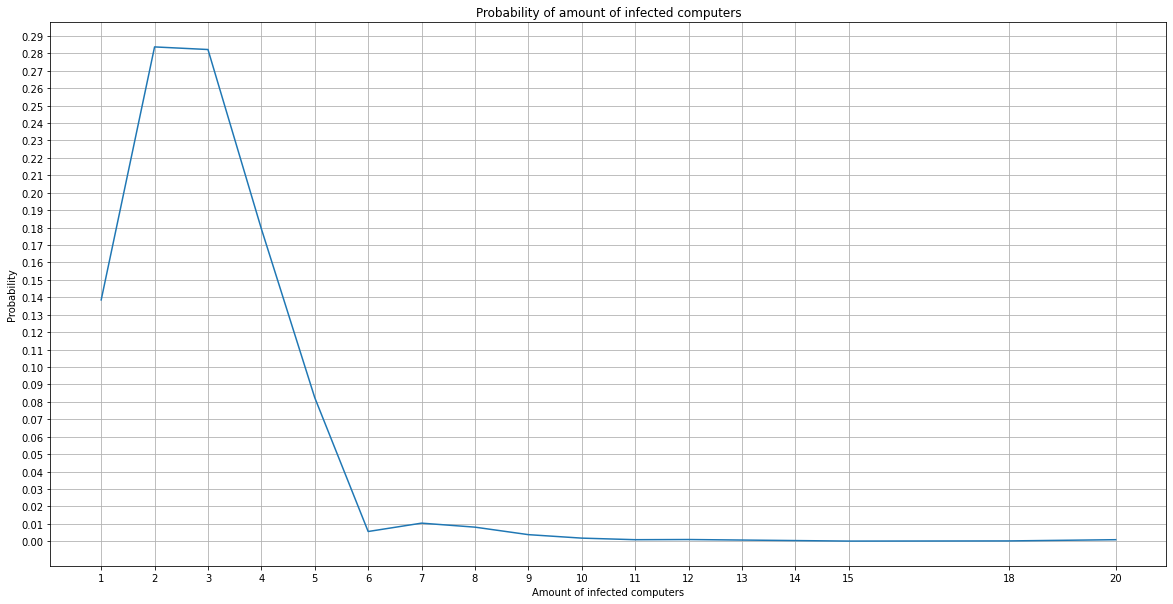

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
x, y = zip(*infected_prob)

ax = plt.gca()
ax.set_title('Probability of amount of infected computers')
ax.set_xlabel('Amount of infected computers')
ax.set_ylabel('Probability')

plt.plot(x, y)
plt.xticks(x)
plt.yticks([x/100 for x in range(0, int(max(y)*100)+2)])
plt.grid()
plt.show()

### Autor

Marek Grzelak